# matplotlib - 2D and 3D plotting in Python

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library includes:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility, convenient when one need to regenerate the figure with updated data or changes its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

To get started using Matplotlib in a Python program, either include the symbols from the `pylab` module (the easy way):

In [1]:
from pylab import *

or import the 'matplotlib.pyplot' module under the name 'plt' (the tidy way):

In [2]:
import matplotlib.pyplot as plt

Oh and by the way, in current version of iPython, if you don't specify, by default
the iPython notebook will plot figures in new separate windows.  I usually prefer 
when working with a notebook to have all figures plotted inside of the iPython
notebook instead.  To force iPython to plot figures inside of a notebook, we can use
the following bit of iPython magic to specify this behavior.

In [3]:
%matplotlib inline

# MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

In [4]:
from pylab import *

### Example

A simple figure with MATLAB-like plotting API:

In [5]:
x = linspace(0, 5, 10)
y = x ** 2

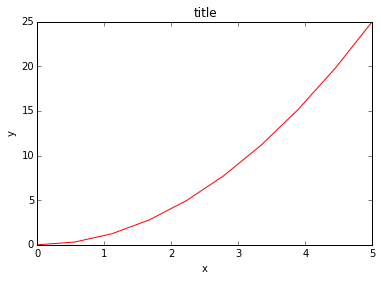

In [6]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

Most of the plotting related functions in MATLAB is covered by the `pylab` module. For example subplot and color/symbol selection:

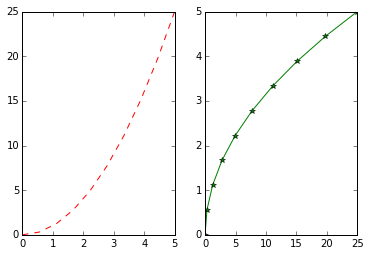

In [7]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not to use the MATLAB compatible API for anything but the simplest figures.

Instead I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful and for advanced figures, with subplots, insets and other components it is very nice to work with. 

# The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`.

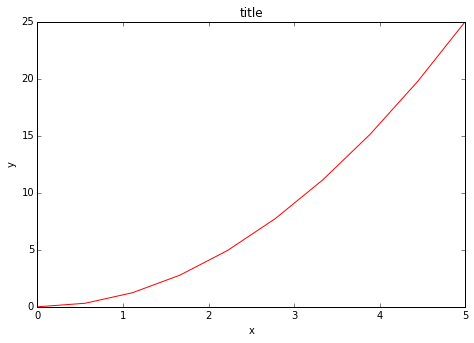

In [8]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.99, 0.99]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are place, and we can easily add more than one axis to the figure.

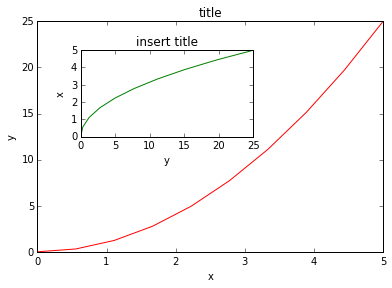

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care to be explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

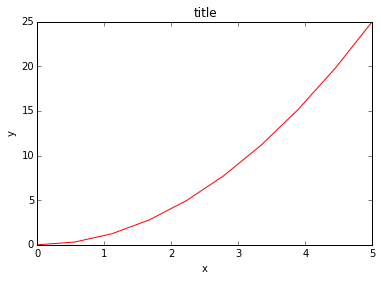

In [10]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

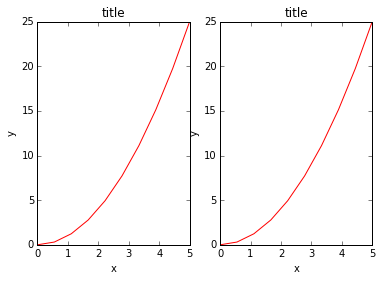

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title');

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

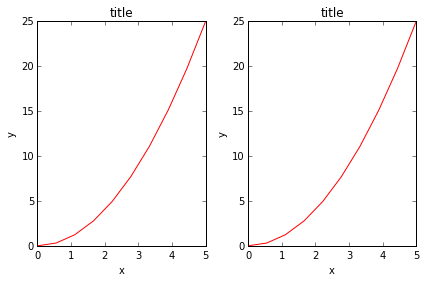

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

## Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple with width and height of the figure in inches, and `dpi` is the dot-per-inch (pixel per inch). To create a figure with size 800 by 400 pixels we can do: 

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function.

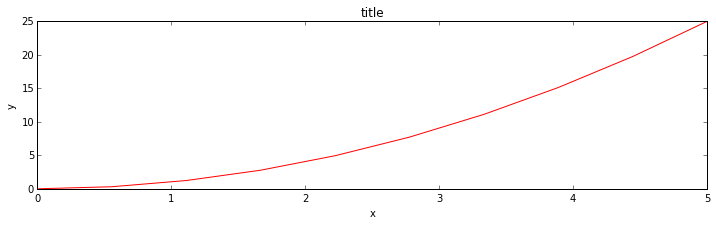

In [14]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures

To save a figure a file we can use the `savefig` method in the `Figure` class. 

In [15]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI, and chose between different output formats.

In [16]:
fig.savefig("filename.png", dpi=200)

In [17]:
fig.savefig("filename.svg")

### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PDF. For scientific papers, use PDF whenever possible (compile LaTeX documents with `pdflatex`, which can include PDFs using the `includegraphics` command). 

## Legends, labels and titles

Now that we covered the basics of how to create a figure canvas and adding axes instances to the canvas, let's look at how decorate a figure with titles, axis labels and legends:

**Figure titles**

A title can be added to each axis instance in a figure. To set the title use the `set_title` method in the axes instance:

In [18]:
ax.set_title("title")

**Axis labels**

Similarly, using the methods `set_xlabel` and `set_ylabel` we can set the labels of the X and Y axes:

In [19]:
ax.set_xlabel("x")
ax.set_ylabel("y")

**Legends**

Legends to curves in a figure can be added in two ways. First method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the curves that have previously been added:

In [20]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follow the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in wrong label being used for wrong curve).

A better method is to use the `label="label text"` keyword argument when plots a other objects are added to the figure, and then using the `legend` method without arguments to add the legend: 

In [21]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes and optional keywork argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some most common alternatives are:

In [22]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure show how to use the figure title, axis labels and legends described above:

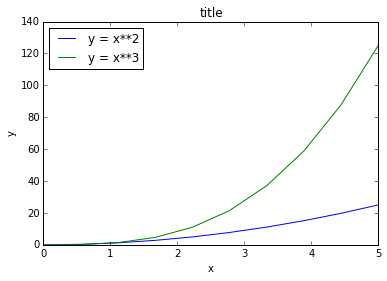

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

## Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX we frequencly use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with and 'r', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`.

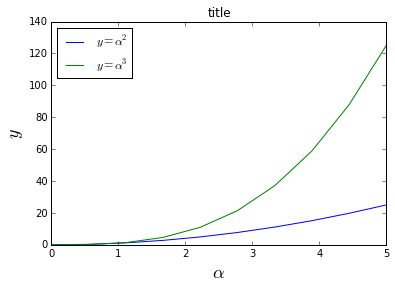

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')
ax.legend(loc=2); # upper left corner

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [25]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

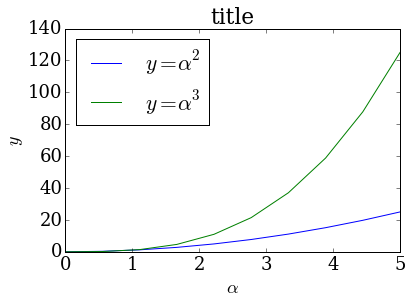

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

In [27]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

## Setting colors, linewidths, linetypes

### Colors

In matplotlib we can define the colors of lines and other graphical elements in a number of way. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where for example 'b.-' mean a blue line with dots.

In [28]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

In matplotlib we can also define colors by their name or RGB hex codes, and optionally provide an alpha value, using the `color` and `alpha` keyword arguments:

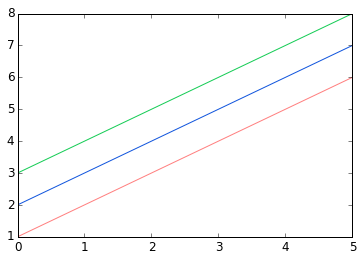

In [29]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

### Line and marker styles

To change the line width we can use the `linewidth` or `lw` keyword argument, and the line style can be selected using the `linestyle` or `ls` keyword arguments:

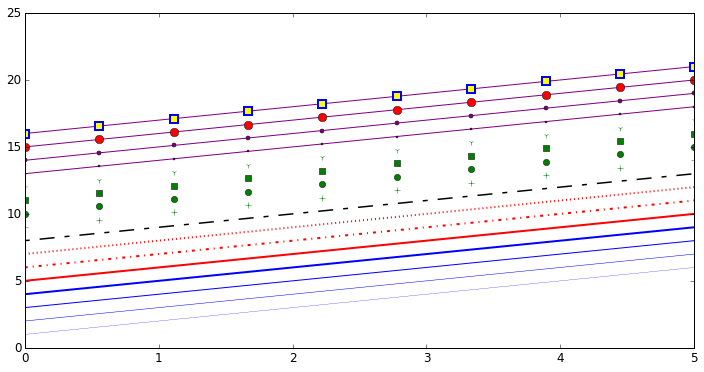

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='*', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='*', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='*', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='*', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Control over axis apperance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

### Plot range

The first thing we might want to configure is the ranges of the axes. We can do it using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges.

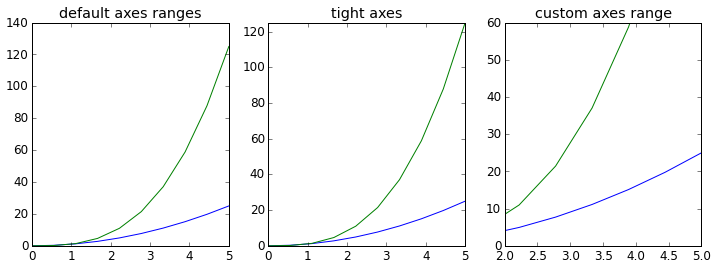

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks using the `set_xticks` and `set_yticks`, which both takes a list of values for where on the axis the ticks are to be placed. We can also use the functions `set_xticklabels` and `set_yticklabels` to provide a list of custom text labels for each tick location:

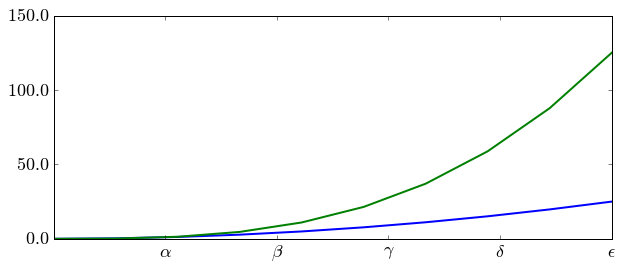

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

In matplotlib there is a number of more advanced methods for controlling major and minor tick placement, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### Axis grid

Using the `grid` method in the axis object we can turn on and off grid lines. We can also customize the appearence of the gridlines, using the same keywork arguments as we previously used with the `plot` function.

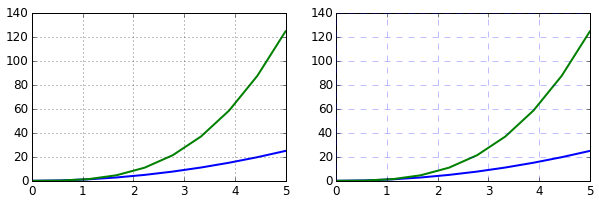

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of the axis spines:

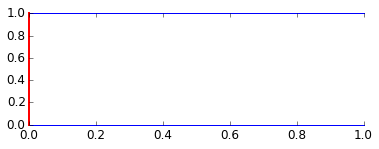

In [34]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure, for example when plotting curves with differnt units together. Matplotlib supports this with the `twinx` and `twiny` functions:

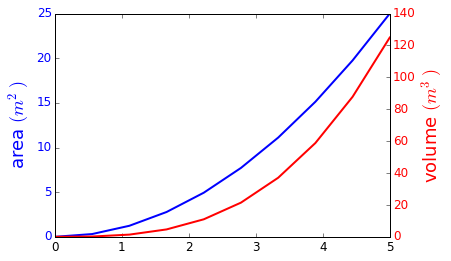

In [35]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

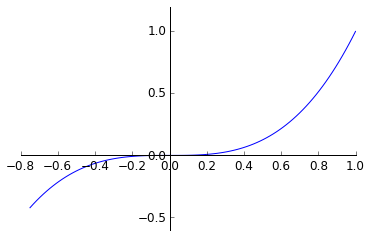

In [36]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Other 2D plot styles

In addition to the function `plot`, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of avaiable plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [37]:
n = array([0,1,2,3,4,5])

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


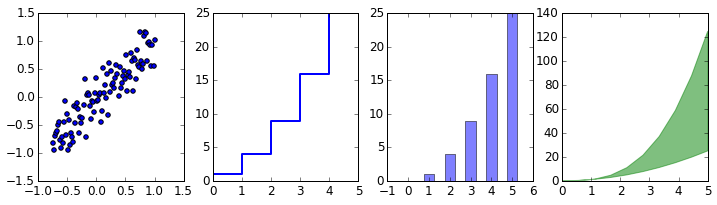

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*randn(len(xx)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

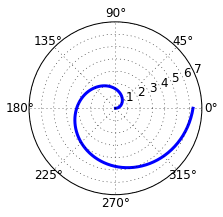

In [39]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 2 * pi, 100)
ax.plot(t, t, color='blue', lw=3);

## Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

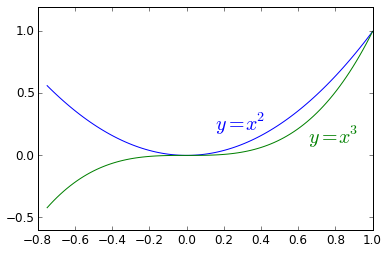

In [40]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `make_axes` or using sub-figure layout manager such as `subplots` or `subplot2grid` or `gridspec`:

### subplots

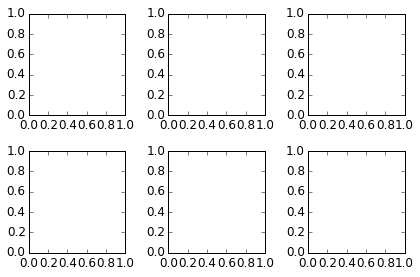

In [41]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

### subplot2grid

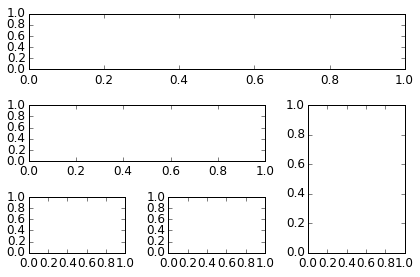

In [42]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### gridspec

In [43]:
import matplotlib.gridspec as gridspec

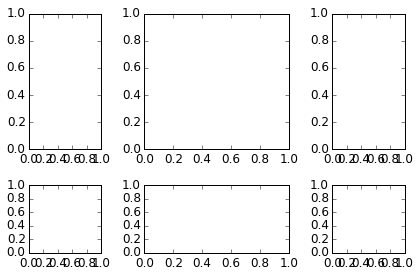

In [44]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

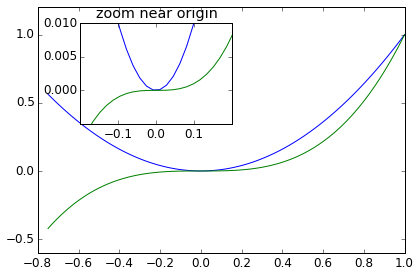

In [45]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There is a number of predefined colormaps, and it is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see:
http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [46]:
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

In [47]:
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

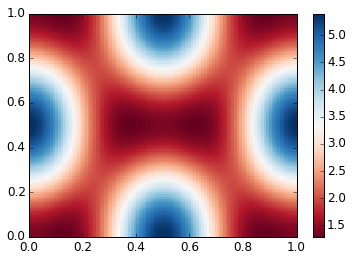

In [48]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*pi), Y/(2*pi), Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

### imshow

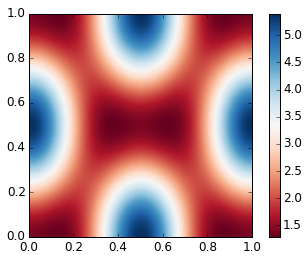

In [49]:
fig, ax = plt.subplots()

im = imshow(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

### contour

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


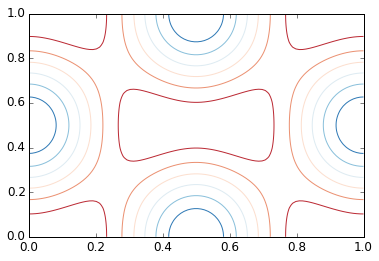

In [50]:
fig, ax = plt.subplots()

cnt = contour(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures

To use 3D graphics in matplotlib, we first need to create an axes instance of the class `Axes3D`. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes, but a conventient way to create a 3D axis instance is to use the `projection='3d'` keyword argument to the `add_axes` or `add_subplot` functions.

In [51]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### Surface plots

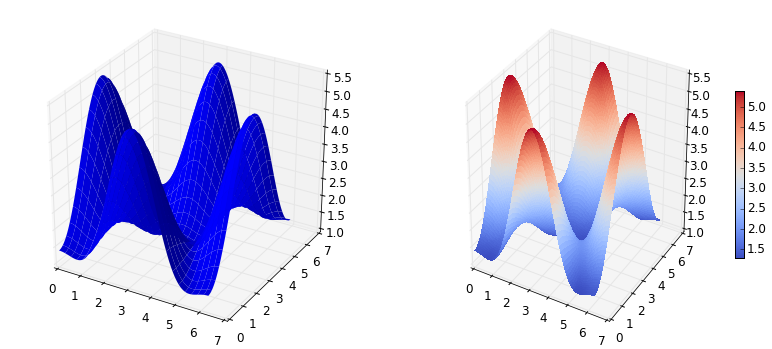

In [52]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### Wire-frame plot

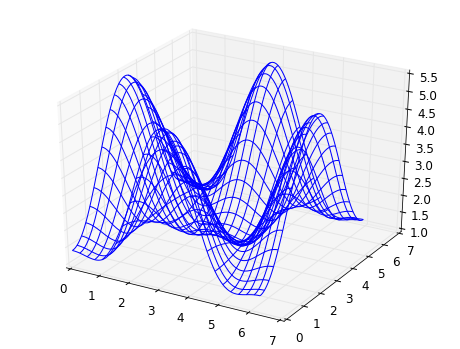

In [53]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### Coutour plots with projections

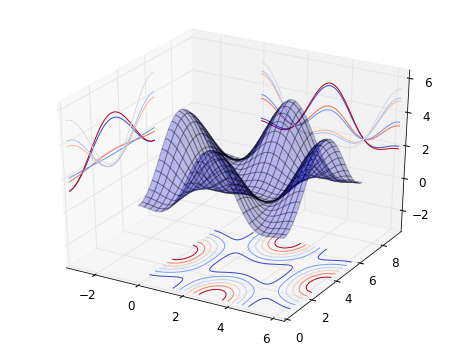

In [54]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

### Change the view angle

We can change the perspective of a 3D plot using the `view_init` function, which takes two arguments: the elevation and the azimuth angles (unit degrees)

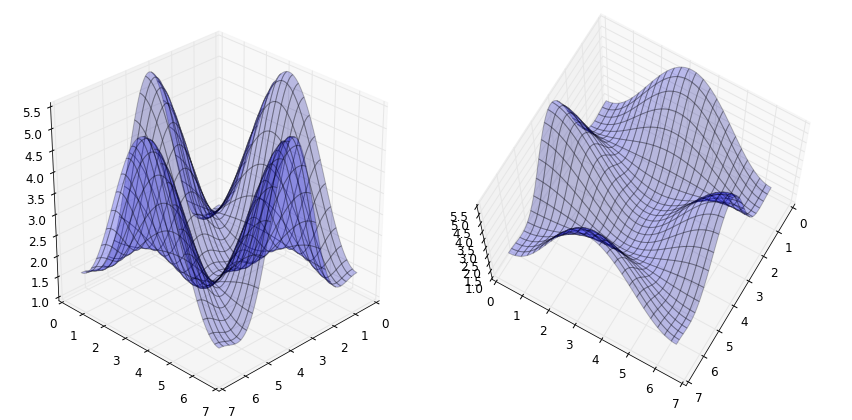

In [55]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## Animations

Matplotlib also includes a simple API for generating animations for sequences of figures. Using the `FuncAnimation` function we can generate a movie file from a sequences of figure. The function takes the following arguments: `fig` a figure canvas, `func` is a function that we provide which updates the figure, `init_func` is a function we provide to setup the figure, `frame` is the number of frames to generate, `blit` tells the animation function to only update parts of the frame that has changed (giving better smoother animations):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

In [56]:
from matplotlib import animation

In [57]:
# solve the ode problem of the double compound pendulum again

from scipy.integrate import odeint

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [pi/2, pi/2, 0, 0]  # initial state
t = linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

Generate an animation that shows the positions of the pendulums as a function of time:

In [58]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

plt.close(fig)

Note: To generate the movie file we need to have the program `ffmpeg` installed. Install it using:

    $ sudo apt-get install ffmpeg

or 

    $ sudo port install ffmpeg

In [59]:
from IPython.display import HTML
video = open("animation.mp4", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)

## Backends

Matplotlib has a number of "backends", which are responsible for rendering graphs. The different backends are able to generate graphics with different formats or using different display technologies. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate images files (with for example the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [60]:
print matplotlib.rcsetup.all_backends

[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'CocoaAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg', u'agg', u'cairo', u'emf', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']


The standard backend is called `agg`, and is based on a library for raster graphics and is great for generating raster formats such as PNG.

Normally we don't need to bother with changing the default backend, but sometimes it can be useful to switch to for example the PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

### Example: Generating SVG with the svg backend

In [61]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1314: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


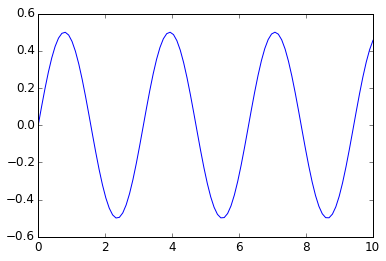

In [62]:
#
# Now we are using the svg backend to produce a SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

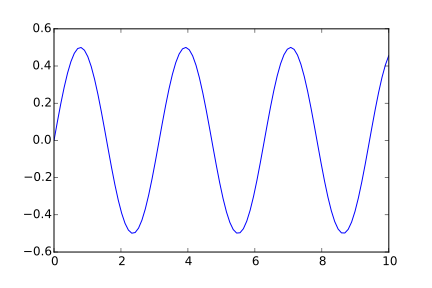

In [63]:
#
# Show the produced SVG file. 
#
SVG(filename="test.svg")

### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend we add:

    %pylab inline

somewhere in the beginning on the notebook.

Since IPython version 1.0, it is also possible to activate inline matplotlib plotting using

    %matplotlib inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy) while `%matplotlib inline` does not important anything, only sets up the inline plotting in the notebook. In new notebooks created for IPython 1.0 I would recommend using `%matplotlib inline`, since it is more tidy and you get better control of which packages are imported and how. Then scipy and numpy can be imported separately if necessary.

### Example: QT interactive backend (this makes more sense in a python script file)

In [64]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# 
import matplotlib
matplotlib.use('MacOSX') # or for example Qt4Agg
import matplotlib.pylab as plt
import numpy

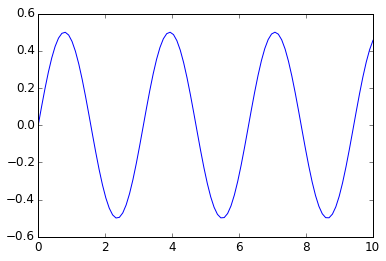

In [65]:
# Now we are using the Qt4Agg backend open an interactive plot window
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.show()

Note that when we use an interactive backend, we need to call `plt.show()` to make the figure appear on the screen.

### Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery that showcase what kind of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.


## Versions

In [66]:
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.10 64bit [GCC 5.2.1 20151010]
IPython 4.0.3
OS Linux 4.2.0 36 generic x86_64 with Ubuntu 15.10 wily
numpy 1.10.4
scipy 0.14.1
matplotlib 1.4.2
Mon Aug 29 10:45:20 2016 CDT

Original versions of these notebooks created by J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [https://bitbucket.org/dharter/intro-compsci-class](https://bitbucket.org/dharter/intro-compsci-class).